# ** Introduction **
>**About Zillow:** Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow.

> In this notebook, I will be analysing Zillow Economics Data.  

## Table of Contents
> 1. [Load the data](#load_the_data)
> 2. [Value of all homes per square in different year ](#value_per_sq_diff_ye)
> 3. [Median of list prices per square foot in different year](#value_listing_per_sq_diff_ye)
> 4. [Median of rental prices per square foot in different year](#rental_price_per_sq_diff_ye)
> 5. [Zillow's different home value in different year](#dif_hom_va_dif_ye)
> 6. [Percentage of home sold in previous year](#perce_home_sold_pre_year)
> 7. [Median of the value of all homes per square foot in different states](#value_home_per_sqft_dif_states)
> 8. [The percentage of all homes in a given area that sold in the past years](#value_home_sold_dif_states)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display

# import plotly
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')


%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

City_time_series.csv
CountyCrossWalk_Zillow.csv
County_time_series.csv
DataDictionary.csv
Metro_time_series.csv
Neighborhood_time_series.csv
State_time_series.csv
Zip_time_series.csv
all_available_metrics.json
cities_crosswalk.csv
fields_per_level.json



<a id="load_the_data"></a>
> # 1. **Load the data**
>> *In this section, I will load the necessary data. For this notebook, I will need only two file. a) **City_time_series.csv** b) **cities_crosswalk.csv***. 

In [2]:
# let's read the 'City_time_series.csv' 
df_city_time_seris = pd.read_csv('../input/City_time_series.csv')
# print top 10 item 
df_city_time_seris.head()

,Date,RegionName,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44700.0,44700.0,74500.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87400.0,131000.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,abilenetaylortx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_cities_crosswalk = pd.read_csv('../input/cities_crosswalk.csv')
df_cities_crosswalk.head()

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI


<a id="value_per_sq_diff_ye"></a>
> # ** 2. Value of all homes per square in different year **
>> **Value of all homes per square** -  Median of the value of all homes per square foot. This number is calculated by taking the estimated home value for each home in a given region and dividing it by the home's square footage. 

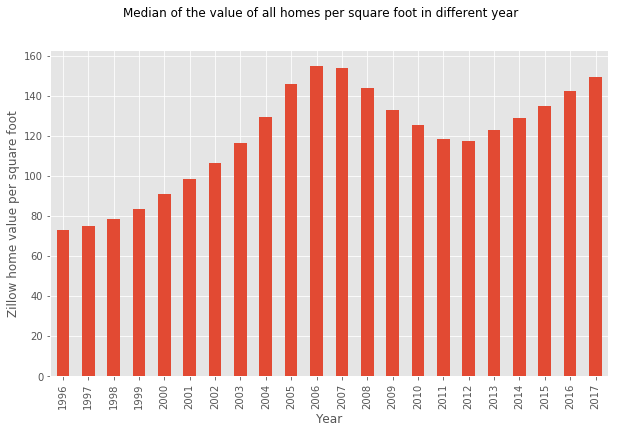

In [4]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of the value of all homes per square foot in different year', fontsize=12)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

> ** It' seems like Zelow home value per square foot is higher in 2005 - 2009 and again high in 2017 **

<a id="value_listing_per_sq_diff_ye"></a>
# ** 3. Median of list prices per square foot in different year ** 
> ** How median of list prices are calculated: ** *Median of list prices divided by the square footage of a home*

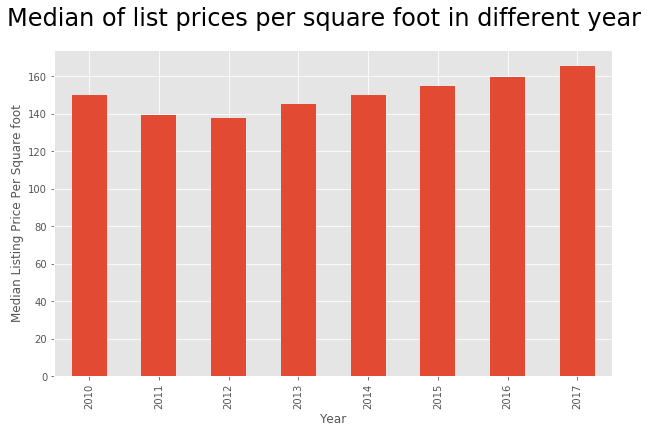

In [5]:
df_city_time_seris_without_null = df_city_time_seris.dropna(subset=['MedianListingPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null.groupby(df_city_time_seris_without_null.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of list prices per square foot in different year', fontsize=24)
plt.ylabel('Median Listing Price Per Square foot')
plt.xlabel('Year')
plt.show()

> It looks like list prices are high in 2017 compares to the previous year. 

<a id="rental_price_per_sq_diff_ye"></a>
# ** 4. Median of rental prices per square foot in different year **
> ** How median of rental prices are calculated: ** *Median of the rental price per square foot of homes listed for rent on Zillow in a given region*

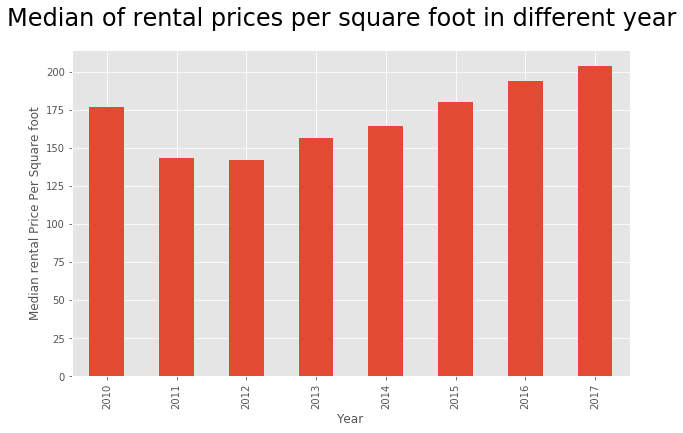

In [6]:
df_city_time_seris_without_null_rent = df_city_time_seris.dropna(subset=['MedianRentalPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null_rent.groupby(df_city_time_seris_without_null_rent.Date.dt.year)['MedianListingPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of rental prices per square foot in different year', fontsize=24)
plt.ylabel('Median rental Price Per Square foot')
plt.xlabel('Year')
plt.show()

> 

<a id="dif_hom_va_dif_ye"></a>
# **5. Zillow's different home value in different year **
> **Zillow home differs from many housing types. Like 2, 3 or 4 bedrooms. Let's see how value differs from different house type.**

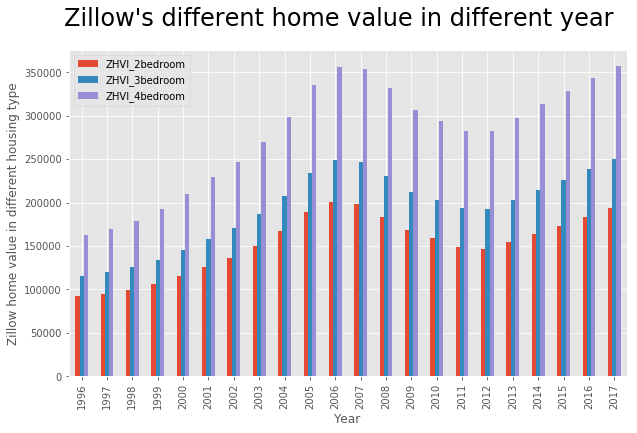

In [7]:
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)[['ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in different housing type')
plt.xlabel('Year')
plt.show()

> It looks like the comparison of 2,3 and 4 bedroom house price is always same.

 <a id="perce_home_sold_pre_year"></a>
 # **6. Percentage of home sold in previous year **
 > ** Let's find out the percentage of home sold in the previous year.**

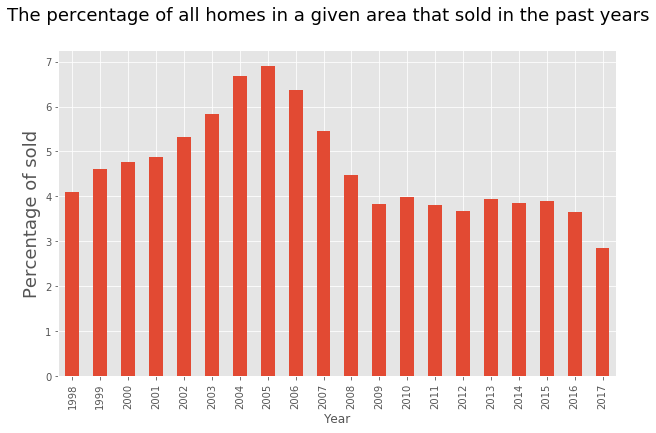

In [8]:
df_city_time_seris_without_null_h_sold = df_city_time_seris.dropna(subset=['Turnover_AllHomes'], how='any')
df_city_time_seris_without_null_h_sold.groupby(df_city_time_seris_without_null_h_sold.Date.dt.year)['Turnover_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("The percentage of all homes in a given area that sold in the past years", fontsize=18)
plt.ylabel('Percentage of sold', fontsize=18)
plt.xlabel('Year')
plt.show()

> Wow! That's interesting. In 2003 - 2007, more homes sold compared to others year. And in 2017, the percentage of the house sells is really low compared to previous year.

In [9]:
# let's replace the regionName column value with State name from cities_crosswalk.csv
df_city_time_seris['RegionName'] = df_city_time_seris['RegionName'].map(df_cities_crosswalk.set_index('Unique_City_ID')['State'])
df_city_time_seris

,Date,RegionName,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44700.0,44700.0,74500.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87400.0,131000.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1996-04-30,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91000.0,87600.0,123900.0,125600.0,169700.0,NaN,NaN,NaN,NaN,NaN
6,1996-04-30,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59000.0,NaN,NaN,NaN,NaN,NaN
7,1996-04-30,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89400.0,89400.0,155000.0,NaN,NaN,NaN,NaN,NaN
8,1996-04-30,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102000.0,87800.0,128700.0,130900.0,189400.0,NaN,NaN,NaN,NaN,NaN
9,1996-04-30,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102300.0,104900.0,127400.0,136200.0,159600.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# group regionName with ZHVIpersqft mean value
df_regi_zhvi_sq_mean = df_city_time_seris.groupby(df_city_time_seris.RegionName)['ZHVIPerSqft_AllHomes'].mean().reset_index(name = "ZHVIpersqft_mean")
# drop null values
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.dropna(subset=['ZHVIpersqft_mean'], how='any')
df_regi_zhvi_sq_mean

,RegionName,ZHVIpersqft_mean
0,AK,128.656326
1,AL,78.894642
2,AR,63.832861
3,AZ,100.153959
4,CA,243.389783
5,CO,144.630565
6,CT,151.999083
7,DC,323.684932
8,DE,104.470174
9,FL,116.886477


 <a id="value_home_per_sqft_dif_states"></a>
# ** 7. Median of the value of all homes per square foot in different states**
> ** Let's see the median value of per square of all homes in different country **

In [11]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


# difine our data for plotting
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_regi_zhvi_sq_mean['RegionName'], # location (states)
        z = df_regi_zhvi_sq_mean['ZHVIpersqft_mean'].astype(float), # Zillow Home value per square foot
        locationmode = 'USA-states', # let's define the location mode to USA_states
        text = 'Median home value per square foot',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value per square foot")
        ) ]

layout = dict(
        title = 'Median of the value of all homes per square foot in different states<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )




    
fig = dict( data=data, layout=layout )
# let's plot
py.iplot( fig, filename='d3-cloropleth-map' )

In [12]:
# group region with percentage of house sold
df_city_time_seris_house_sold = df_city_time_seris.groupby(df_city_time_seris.RegionName)['Turnover_AllHomes'].mean().reset_index(name = "percen_sold_house")
# drop null values
df_city_time_seris_house_sold = df_city_time_seris_house_sold.dropna(subset=['percen_sold_house'], how='any')
df_city_time_seris_house_sold

,RegionName,percen_sold_house
1,AL,3.104108
2,AR,3.819870
3,AZ,6.272450
4,CA,5.403477
5,CO,6.204009
6,CT,4.816915
7,DC,5.332129
8,DE,3.712853
9,FL,6.263124
10,GA,4.799326


 <a id="value_home_sold_dif_states"></a>
# ** 8. The percentage of all homes in a given area that sold in the past years **
> **Okay! Let's see the percentage of sold of the house in different states.**

In [13]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_city_time_seris_house_sold['RegionName'],
        z = df_city_time_seris_house_sold['percen_sold_house'].astype(float),
        locationmode = 'USA-states',
        text = 'Percentage of sold',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% of sold")
        ) ]

layout = dict(
        title = 'The percentage of all homes in a given area that sold in the past years<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )




    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )